#  回帰
回帰は、教師あり学習の一種で、変数間の関係を予測します。  
今回は、単回帰と重回帰の２つを解説します。

## ●データセットの読み込み
ボストン住宅価格のデータセットを読み込みます。  
このデータセットには、**説明変数**と**目的変数**が含まれます。  
**説明変数**: 何かの原因となっている変数  
**目的変数**: その原因を受けて発生した結果である変数

In [2]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)  # data: 説明変数
boston_df["PRICE"] = boston.target  # target: 目的変数
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


説明変数が様々な住宅の特徴で、目的変数が住宅の価格であることが分かります。  
各列のラベルの意味は、`DESCR`により表示することができます。

In [ ]:
print(boston.DESCR)  # データセットの説明

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

データセットの特徴を把握するために、統計量を表示します。

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


データセットを、訓練用のデータとテスト用のデータに分割します。

In [3]:
from sklearn.model_selection import train_test_split

# 訓練データとテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(boston.data, boston.target, random_state=0) 

## ●単回帰
単回帰では、直線を使い1つの説明変数で目的変数を予測します。  
$x$を説明変数、$y$を目的変数、$a$を係数、$b$を切片としたとき、単回帰は以下の式で表されます。  
$$y = ax + b$$

In [ ]:
from sklearn import linear_model

# RM（部屋数）の列を取得
x_rm_train = x_train[:, [5]]
x_rm_test = x_test[:, [5]]

model = linear_model.LinearRegression() # 線形回帰モデル
model.fit(x_rm_train, t_train)  # モデルの訓練

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

係数と切片を取得します。

In [ ]:
a = model.coef_ # 係数
b = model.intercept_ # 切片
print("a: ", a) 
print("b: ", b) 

a:  [9.31294923]
b:  -36.180992646339206


データ及び回帰直線をグラフで表示します。

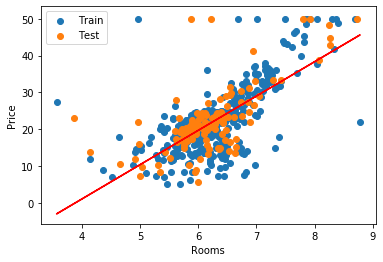

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_rm_train, t_train, label="Train")
plt.scatter(x_rm_test, t_test, label="Test")

y_reg = a * x_rm_train + b  # 回帰直線
plt.plot(x_rm_train, y_reg, c="red") 

plt.xlabel("Rooms")
plt.ylabel("Price")
plt.legend()
plt.show()

モデルをMSE（平均二乗誤差 Mean Squared Error）を計算します。  

MSEは、$E$を誤差、$y_k$を予測値、$t_k$を正解値として以下の式で定義されます。

$$ E = \frac{1}{n} \sum_{k=1}^n(y_k-t_k)^2 $$

この誤差が小さいほどモデルの誤差が小さくなります。  

以下のコードは、訓練データとテストデータ、それぞれでMSEを計算します。

In [ ]:
from sklearn.metrics import mean_squared_error

# 訓練データ
y_train = model.predict(x_rm_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train)

# テストデータ
y_test = model.predict(x_rm_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test)

MSE(Train):  43.71870658739849
MSE(Test):  43.472041677202206


## ●重回帰
重回帰では、複数の説明変数を使い目的変数を予測します。  
重回帰は、$x_k$を各説明変数として以下の式で表されます。

$$ y = \sum_{k=1}^na_kx_k + b $$

今回は、13種類の説明変数を全て使って重回帰分析を行います。

In [ ]:
model = linear_model.LinearRegression() # 線形回帰

# 全ての説明変数を使い学習
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

各説明変数に対応した係数を取得します。

In [ ]:
a_df = pd.DataFrame(boston.feature_names, columns=["Exp"])
a_df["a"] = pd.Series(model.coef_)
a_df

,Exp,a
0,CRIM,-0.117735
1,ZN,0.044017
2,INDUS,-0.005768
3,CHAS,2.393416
4,NOX,-15.589421
5,RM,3.768968
6,AGE,-0.007035
7,DIS,-1.434956
8,RAD,0.240081
9,TAX,-0.011297


切片を取得します。

In [ ]:
print("b: ", model.intercept_)

b:  36.93325545712031


訓練データとテストデータ、それぞれでMSE（平均二乗誤差）を計算します。

In [ ]:
# 訓練データ
y_train = model.predict(x_train)
mse_train = mean_squared_error(t_train, y_train)
print("MSE(Train): ", mse_train)

# テストデータ
y_test = model.predict(x_test)
mse_test = mean_squared_error(t_test, y_test)
print("MSE(Test): ", mse_test)

MSE(Train):  19.640519427908046
MSE(Test):  29.78224509230252


単回帰の場合よりも誤差が小さくなりました。  
ただ、テストデータの誤差は訓練データの誤差よりも大幅に大きくなりました。  
モデルが訓練データに過剰に適合していないか、慎重に判断する必要があります。